# Drift Example

Simple 1 m drift.

In [1]:
from pmd_beamphysics import single_particle
from pmd_beamphysics.units import mec2

import impact.z as IZ

In [2]:
reference_particle_mass = mec2
energy = 10e6
gamma = energy / mec2
sigma_x0 = 0.001
norm_emit_x = 1e-12
norm_emit_y = 1e-12
beta_x = sigma_x0**2 * gamma / norm_emit_x
beta_y = beta_x

initial_particles = single_particle(pz=energy, px=0.01 * energy)

In [3]:
input = IZ.ImpactZInput(
    # line 1
    ncpu_y=1,
    ncpu_z=1,
    # line 2
    seed=6,
    n_particle=100_000,
    integrator_type="linear_map",
    err=1,
    diagnostic_type="extended",
    # line 3
    nx=32,
    ny=32,
    nz=32,
    boundary_type="trans_open_longi_open",
    radius_x=0.15,  # particles die after this point
    radius_y=0.15,
    z_period_size=0.0,  # TODO we think this is unused based on fortran code reading
    # line 4
    distribution="read",
    restart=0,
    subcycle=0,  # TODO what is this?
    nbunch=1,
    # line 5
    # line 6
    # line 7
    # line 8
    twiss_alpha_x=0.0,
    twiss_beta_x=beta_x,
    twiss_norm_emit_x=norm_emit_x,
    twiss_mismatch_x=1.0,
    twiss_mismatch_px=1.0,
    twiss_offset_x=0.0,
    twiss_offset_px=0.0,
    # line 9
    twiss_alpha_y=0.0,
    twiss_beta_y=beta_y,
    twiss_norm_emit_y=norm_emit_y,
    twiss_mismatch_y=1.0,
    twiss_mismatch_py=1.0,
    twiss_offset_y=0.0,
    twiss_offset_py=0.0,
    # line 10
    twiss_alpha_z=1e-9,
    twiss_beta_z=5e9,  # 1.0,
    twiss_norm_emit_z=1e-9,  # 1e-6,
    twiss_mismatch_z=1.0,
    twiss_mismatch_e_z=1.0,
    twiss_offset_phase_z=0.0,
    twiss_offset_energy_z=0.0,
    # line 11
    # average_current=1.0,  # space charge on
    average_current=0.0,  # space charge off
    reference_kinetic_energy=energy - mec2,  # eV -> 10MeV total energy
    reference_particle_mass=reference_particle_mass,
    reference_particle_charge=-1.0,
    reference_frequency=1e9,  # arbitrarily set to 1GHz here
    initial_phase_ref=0.0,
    lattice=[
        IZ.WriteFull(file_id=1999),
        # Drift(length=1e-9, steps=10, map_steps=10),  # <- to get initial particles, set this and set average_current to 0.0
        IZ.Drift(length=1.0, radius=1.0, steps=10, map_steps=10, name="drift1"),
        IZ.WriteFull(file_id=2000, name="final_particles"),
    ],
)

In [4]:
input.space_charge_off()
# input.space_charge_on(current=1.0)

In [5]:
I = IZ.ImpactZ(input, initial_particles=initial_particles)
output = I.run(verbose=True)

Configured to run in: /tmp/tmpkz0f8h8a
Running Impact-Z in /tmp/tmpkz0f8h8a
/home/runner/miniconda3/envs/lume-impact-dev/bin/ImpactZexe


<!-- lume-impact detected Jupyter and will use HTML for rendering. -->

  0%|          | 0/3 [00:00<?, ?it/s]

 Read input data from file - ImpactZ.in:
 !-----------------------------------------------------------
 ! IMPACT-Z: Integrated Map and PArticle Tracking Code: Version 2.7
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 check random:            0  0.320923269    
 pass generating initial distribution...
 pass setting up lattice...
 enter elment (type code):            1          -2
 zedge:    0.0000000000000000     
 enter elment (type code):            2           0
 zedge:    0.0000000000000000     
 j, nstep, z           1           1  0.10000000000000001     
 j, nstep, z           2           2  0.20000000000000001     
 j, nstep, z           3           3  0.29999999999999999     
 j, nstep, z           4           4  0.39999999999999997     
 j, nstep, z           5           5  0.49999999999999994     
 j, nstep, z           6           6  0.59999999999999998     
 j, nstep, z           7           7  0.7

In [6]:
I.output

ImpactZOutput(
    run=RunInfo(
        error=False,
        error_reason='',
        run_script='/home/runner/miniconda3/envs/lume-impact-dev/bin/ImpactZexe',
        run_time=0.05455274900009499
    ),
    stats=OutputStats(
        beta_ref=array([0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355]),
        charge_state_n_particle=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
        gamma_ref=array([19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181]),
        kinetic_energy_ref=array([9489001.04931, 9489001.04931, 9489001.04931, 9489001.04931,
       9489001.04931, 9489001.04931, 9489001.04931, 9489001.04931,
       9489001.04931, 9489001.04931, 9489001.04931]),
        loadbalance_max_n_particle=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
        loadbalance_min_n_particle=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
        max_amplitude_energy_dev=array([], dtype=float64),
        max_amplitude_gammabeta_x=array([], dtype=float64),
        max_amplitude_gammabeta_y=array([], dtype=float64),
        max_amplitude_phase=array([], dtype=float64),
        max_amplitude_x=array([], dtype=float64),
        max_amplitude_y=array([], dtype=float64),
        max_r=array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 ]),
        mean_phase_deg=array([0.        , 0.00558626, 0.01117252, 0.01675878, 0.02234504,
       0.0279313 , 0.03351756, 0.03910382, 0.04469007, 0.05027633,
       0.05586259]),
        mean_px_over_p0=array([0.01001308, 0.01001308, 0.01001308, 0.01001308, 0.01001308,
       0.01001308, 0.01001308, 0.01001308, 0.01001308, 0.01001308,
       0.01001308]),
        mean_py_over_p0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        mean_x=array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 ]),
        mean_y=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        moment3_energy=array([], dtype=float64),
        moment3_phase=array([], dtype=float64),
        moment3_px_over_p0=array([], dtype=float64),
        moment3_py_over_p0=array([], dtype=float64),
        moment3_x=array([], dtype=float64),
        moment3_y=array([], dtype=float64),
        moment4_energy=array([], dtype=float64),
        moment4_phase=array([], dtype=float64),
        moment4_px_over_p0=array([], dtype=float64),
        moment4_py_over_p0=array([], dtype=float64),
        moment4_x=array([], dtype=float64),
        moment4_y=array([], dtype=float64),
        n_particle=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
        norm_emit_x=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        norm_emit_y=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        norm_emit_z=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        phase_ref=array([ 0.        ,  2.09858673,  4.19717345,  6.29576018,  8.39434691,
       10.49293363, 12.59152036, 14.69010709, 16.78869382, 18.88728054,
       20.98586727]),
        sigma_energy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        sigma_phase_deg=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        sigma_px_over_p0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        sigma_py_over_p0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        sigma_x=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        sigma_y=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
        twiss_alpha_x=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
        twiss_alpha_y=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
        twiss_alpha_z=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
        z=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
        max_abs_x=array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009,

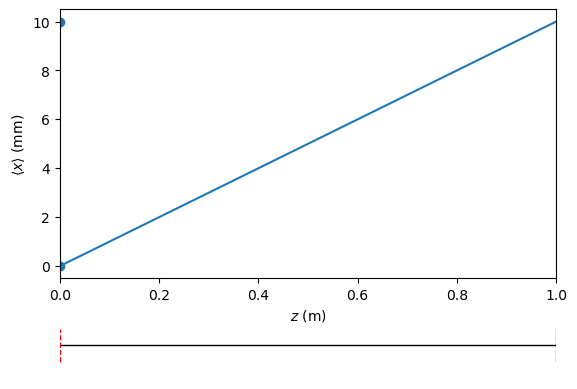

In [7]:
I.plot("mean_x")